In [1]:
import os
import numpy as np
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt

os.getcwd()

'c:\\Users\\matte\\OneDrive\\Desktop\\Università\\Trieste\\Second_year\\HPC21\\Cozzini\\MPI\\Assignment1\\prob1'

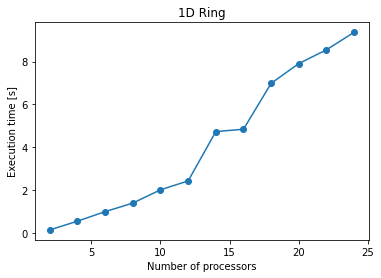

In [5]:
x = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])
y = np.array([0.145, 0.554, 0.998, 1.396, 2.017, 2.431, 4.734, 4.844, 6.986, 7.910, 8.552, 9.370])

plt.figure()
plt.scatter(x, y)
plt.plot(x, y)
plt.title('1D Ring')
plt.xlabel("Number of processors")
plt.ylabel("Execution time [s]")
plt.show()

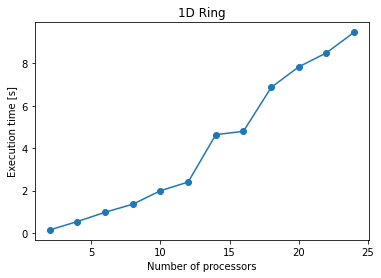

In [3]:
filename = 'prob1_dataframe.out'
data_frame = pd.read_csv(filename, sep='\t', header=None)
data_frame
x = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])
averages = data_frame.mean(axis=1)
averages

plt.figure()
plt.scatter(x, averages)
plt.plot(x, averages)
plt.title('1D Ring')
plt.xlabel("Number of processors")
plt.ylabel("Execution time [s]")
plt.show()

In [4]:
averages

0     0.145444
1     0.541556
2     0.979667
3     1.357667
4     1.994444
5     2.404222
6     4.637333
7     4.797667
8     6.863333
9     7.839111
10    8.499333
11    9.469111
dtype: float64

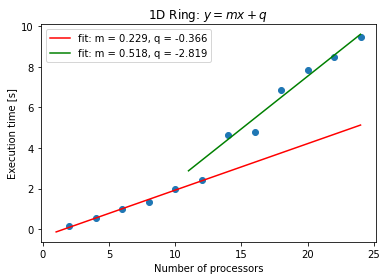

In [5]:
def retta(x, m, q):
	return m*x + q


pre12, _ = curve_fit(retta, x[0:6], averages[0:6])
pre12_m, pre12_q = pre12
post12, _ = curve_fit(retta, x[6:12], averages[6:12])
post12_m, post12_q = post12

x_line = np.arange(1, 25, 1)
y_line_pre12 = retta(x_line, pre12_m, pre12_q)
y_line_post12 = retta(x_line, post12_m, post12_q)


plt.figure()
plt.scatter(x, averages)
plt.plot(x_line, y_line_pre12, '-', color='red', label='fit: m = %.3f, q = %.3f' % ((pre12_m), pre12_q))
plt.plot(x_line[10:], y_line_post12[10:], '-', color='green', label='fit: m = %.3f, q = %.3f' % ((post12_m), post12_q))
plt.title("1D Ring: "+r'$y = mx + q$')
plt.xlabel("Number of processors")
plt.ylabel("Execution time [s]")
plt.legend()
plt.show()

In [11]:
y_fit1 = retta(x[0:6], pre12_m, pre12_q)
y_fit2 = retta(x[6:12], post12_m, post12_q)

ss_res1 = np.sum((averages[0:6] - y_fit1) ** 2)
ss_res2 = np.sum((averages[6:12] - y_fit2) ** 2)


# total sum of squares
ss_tot1 = np.sum((averages[0:6] - np.mean(averages[0:6])) ** 2)
ss_tot2 = np.sum((averages[6:12] - np.mean(averages[6:12])) ** 2)


# r-squared
r2_1 = 1 - (ss_res1 / ss_tot1)
r2_2 = 1 - (ss_res2 / ss_tot2)

print(r2_1, r2_2)

0.0209225820105819 0.736271931099353
3.6920470308641975 19.497892504115214
0.9943330673104441 0.9622383839205209


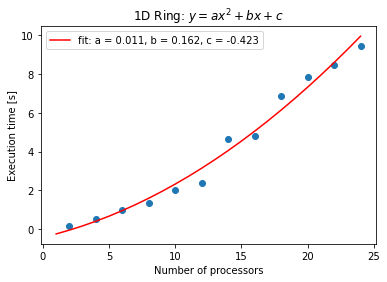

In [13]:
def parab(x, a, b, c):
	return a*x**2 + b*x + c


fit, _ = curve_fit(parab, x, averages)
fit_a, fit_b, fit_c = fit

x_line = np.arange(1, 25, 1)
y_line = parab(x_line, fit_a, fit_b, fit_c)

plt.figure()
plt.scatter(x, averages)
plt.plot(x_line, y_line, '-', color='red', label='fit: a = %.3f, b = %.3f, c = %.3f' % ((fit_a, fit_b, fit_c)))
plt.title("1D Ring: "+r'$y = ax^2 + bx + c$')
plt.xlabel("Number of processors")
plt.ylabel("Execution time [s]")
plt.legend()
plt.show()

In [14]:
y_fit = parab(x, fit_a, fit_b, fit_c)

ss_res = np.sum((averages - y_fit) ** 2)

# total sum of squares
ss_tot = np.sum((averages - np.mean(averages)) ** 2)

# r-squared
r2 = 1 - (ss_res / ss_tot)

r2

0.982139380549203

In [31]:
x_line = np.arange(0, 25, 2)
x_line

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24])

In [30]:
np.arange(0, 30, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])